# Survey Comparison w/ airport.SAN Model Base Scenario #261 Yr2022

## Set-Up

In [1]:
# import numpy as np
# import os
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt

In [ ]:
survey_data_path = r"..\..\data\processed\data_model_output_taz.csv"
# survey_data_no_synthetic_path = r'../data/processed/data_model_output.csv'
model_data_path = r"..\..\data\external\airport.SAN model\airport-SAN-mode-split-scen261.csv"

In [22]:
drop_employees = True

In [23]:
# TODO: discuss how to handle critical validation errors
survey_data_base = pd.read_csv(survey_data_path)
survey_data_initial_len = survey_data_base.shape[0]
survey_data_base = (
    survey_data_base
        .query("validation_severity_person != 'Critical'")
        .query("validation_severity_trip != 'Critical'")
)
if drop_employees:
    survey_data_base = survey_data_base.query(f'purpose_segment.str.lower() != "employee"')
print(f'dropped {survey_data_initial_len-survey_data_base.shape[0]} responses')

C:\Users\mwe\AppData\Local\Temp\ipykernel_100416\825114376.py:2: DtypeWarning: Columns (7,8,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,41,42,45,49,52,57,58,60,61,62,64,69,71,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,111,115,116,118,119,126,127,132,133,141,142,143,145,152,156,158,161,173,175,208,214,215,216,218,220,221,223,224,225,226,227,245,258,259,260,261,309) have mixed types. Specify dtype option on import or set low_memory=False.
  survey_data_base = pd.read_csv(survey_data_path)


dropped 668 responses


In [24]:
survey_nonweight_cols = [col for col in survey_data_base.columns if 'weight' not in col]
survey_melt = survey_data_base.melt(id_vars = survey_nonweight_cols, var_name = 'source', value_name = 'weight')
survey_melt.head()

,Unnamed: 0,unique_id,is_valid_record,time_completed,record_type_synthetic,access_mode,access_mode_frequency_label,access_mode_grouped_label,access_mode_label,access_mode_other,...,walk_prm_time,walk_prm_fare,party_size_label_transformed,purpose_segment,taxi_fare_model,tnc_fare_model,taxi_mean_wait_model,tnc_mean_wait_model,source,weight
0,756,757,True,13:52:37,0,NaN,ALWAYS,NaN,NaN,NaN,...,NaN,7.5,ONE,RESIDENT_BUSINESS,159.989811,48.979763,9.5,6.3,weight_departing_and_arriving,3.577735
1,757,758,True,15:26:59,0,NaN,ALWAYS,NaN,NaN,NaN,...,NaN,7.5,NONE,RESIDENT_NON_BUSINESS,49.576478,16.859521,9.5,6.3,weight_departing_and_arriving,1.746407
2,758,759,True,17:07:15,0,NaN,ALWAYS,NaN,NaN,NaN,...,92.227949,0.5,NONE,RESIDENT_BUSINESS,37.763372,13.422981,9.5,6.3,weight_departing_and_arriving,1.746407
3,759,760,True,13:43:27,0,NaN,ALWAYS,NaN,NaN,NaN,...,58.824008,0.5,NONE,RESIDENT_NON_BUSINESS,24.252795,9.492631,9.5,6.3,weight_departing_and_arriving,1.090650
4,760,761,True,14:20:18,0,NaN,ALWAYS,NaN,NaN,NaN,...,NaN,7.5,NONE,RESIDENT_NON_BUSINESS,49.796358,16.923486,9.5,6.3,weight_departing_and_arriving,1.340165


In [25]:
# read in model data
model_data_base = pd.read_csv(model_data_path)

## Mode Comparison

### Survey

In [26]:
survey_mode_replace_dict = {
       'AIRPORT_FLYER_SHUTTLE': 'TRANSIT', #TODO is this the correct coding
       'BICYCLE_ELECTRIC_BIKESHARE': 'BIKE',
       'BICYCLE_NON_ELECTRIC_BIKESHARE': 'BIKE',
       'BICYCLE_PERSONAL_ELECTRIC': 'BIKE',
       'BICYCLE_PERSONAL_NON_ELECTRIC': 'BIKE',
       'CAR_SERVICE_BLACK_LIMO': 'TAXI/TNC', #not sure if correctly coded
       'CHARTERED_TOUR_BUS': 'SHUTTLE_VAN', #not sure if correctly coded
       'DROPPED_OFF_BY_FAMILY_FRIEND': 'CURB',
       'DROVE_ALONE_AND_PARKED': 'PARKED',
       'DROVE_WITH_OTHERS_AND_PARKED': 'PARKED',
       'EMPLOYEE_SHUTTLE': 'EMPLOYEE_SHUTTLE',
       'GET_IN_PARKED_VEHICLE_AND_DRIVE_ALONE': 'PARKED',
       'GET_IN_PARKED_VEHICLE_AND_RIDE_WITH_OTHER_TRAVELERS': 'PARKED',
       'HOTEL_SHUTTLE_VAN': 'HOTEL_SHUTTLE_VAN',
       'MTS_ROUTE_992': 'TRANSIT',
       'OTHER': 'OTHER',
       'OTHER_PUBLIC_TRANSIT': 'TRANSIT',
       'OTHER_SHARED_VAN': 'SHUTTLE_VAN',
       'PICKED_UP_BY_FAMILY_FRIEND': 'CURB',
       'REFUSED_NO_ANSWER': 'REFUSED_NO_ANSWER',
       'RENTAL_CAR_DROPPED_OFF': 'RENTAL',
       'RENTAL_CAR_GET_IN_PARKED': 'RENTAL',
       'RENTAL_CAR_PARKED': 'RENTAL',
       'RENTAL_CAR_PICKED_UP': 'RENTAL',
       'RODE_WITH_OTHER_TRAVELERS_AND_PARKED': 'PARKED',
       'TAXI': 'TAXI/TNC',
       'UBER_LYFT': 'TAXI/TNC',
       'WALK': 'WALK',
       'WHEELCHAIR_OR_MOBILITY_DEVICE': 'WALK',
       'GET_IN_PARKED_VEHICLE_AND_DRIVE_WITH_OTHERS': 'PARKED'
 }

In [27]:
# map modes for comparison
survey_melt['mapped_mode'] = (
        survey_melt
            ['main_mode_label']
            .replace(survey_mode_replace_dict)
)

# normalized weighted mapped mode counts w/ synthetic data
survey_mode = (
    survey_melt
        .groupby(['source','mapped_mode'])
        ['weight']
        .sum()
        .sort_values(ascending=False)
) / survey_melt.groupby('source')['weight'].sum()
survey_mode = (
    survey_mode
        .to_frame()
        .reset_index(drop=False)
        .rename(columns={'weight':'count'})
)

### Model

In [28]:
model_mode = (
    model_data_base
        .groupby('mapped_mode')
        ['count']
        .sum()
        .sort_values(ascending=False)
) / model_data_base['count'].sum()
model_mode = model_mode.to_frame().reset_index(drop=False)
model_mode['source'] = 'Model'

### Compare

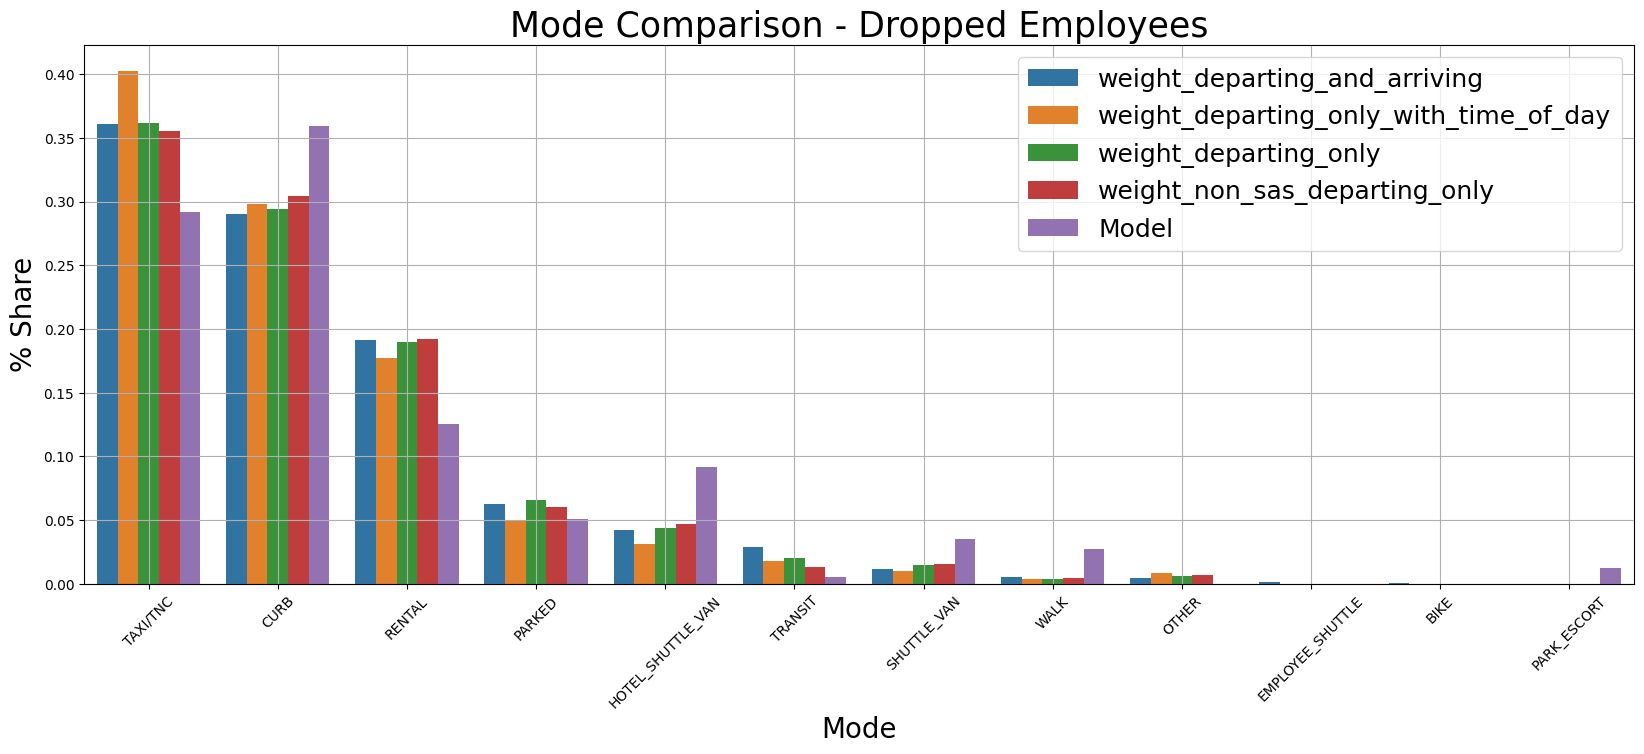

In [29]:
compare_modes = pd.concat([survey_mode, model_mode])
fig, ax = plt.subplots(figsize=(20,7))
sns.barplot(
    data = compare_modes,
    x='mapped_mode',
    y='count',
    hue='source'
)
ax.tick_params(axis='x', labelrotation=45)
plt.title(f'Mode Comparison{drop_employees * " - Dropped Employees"}', fontsize=25)
plt.ylabel("% Share", fontsize=20)
plt.xlabel('Mode', fontsize=20)
plt.legend(fontsize=18)
plt.grid()
plt.show()